#  Оценка качества модели

### Угадываем признак

In [127]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore") 

In [128]:
data = pd.read_csv('athletes.csv')
data.head()

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0


In [129]:
#data.info()

Посмотрим много ли в наших признаках пустых значений

In [130]:
#data[ pd.isnull( data['height'] ) ].head()

In [131]:
print('Для height пустых строк ' + str( len( data[ pd.isnull( data['height'] ) ] ) ))
print('Для weight пустых строк ' + str( len( data[ pd.isnull( data['weight'] ) ] ) ))
print('Для sport пустых строк ' + str( len( data[ pd.isnull( data['sport'] ) ] ) ))
print('Всего строк в наборе ' + str( len( data ) ))

Для height пустых строк 330
Для weight пустых строк 659
Для sport пустых строк 0
Всего строк в наборе 11538


In [132]:
#data['height'].unique()

In [133]:
data = data[ pd.isnull( data['height'] ) == 0 ]
data = data[ pd.isnull( data['weight'] ) == 0 ]

In [134]:
#data.info()

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

### Строим модель

In [136]:
X = data.drop(['sex'], axis=1)
X.head(3)

,id,name,nationality,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,5/27/92,1.98,79.0,athletics,0,0,1


In [137]:
y = data['sex']

In [138]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le = LabelEncoder()
ohe = OneHotEncoder()

In [139]:
ft = ohe.fit_transform(data[['nationality', 'sport']])

In [140]:
ft.toarray().shape

(10858, 227)

In [141]:
ohe.transform(data[['nationality', 'sport']])

<10858x227 sparse matrix of type '<class 'numpy.float64'>'
	with 21716 stored elements in Compressed Sparse Row format>

In [142]:
X = data[['height', 'weight', 'gold', 'silver', 'bronze']]
X.head(4)

,height,weight,gold,silver,bronze
0,1.72,64.0,0,0,0
1,1.68,56.0,0,0,0
2,1.98,79.0,0,0,1
3,1.83,80.0,0,0,0


In [143]:
le.fit( data['sex'] )

LabelEncoder()

In [144]:
y = pd.Series( data = le.transform( data['sex'] ) )
y.head()

0    1
1    0
2    1
3    1
4    1
dtype: int32

In [145]:
model = LogisticRegression()

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=800)
X_train.head(5)

,height,weight,gold,silver,bronze
3128,1.63,52.0,0,0,0
2611,1.90,87.0,0,0,0
148,1.62,65.0,0,0,0
27,1.85,75.0,0,0,0
8908,1.75,65.0,0,0,0


In [147]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [148]:
from sklearn.metrics import roc_curve, accuracy_score, precision_score, recall_score

In [149]:
#predictions = model.predict(X_test)
predictions = model.predict_proba(X_test)[:, 1]

In [150]:
predictions

array([0.26727438, 0.11336214, 0.71399665, ..., 0.85176375, 0.89523018,
       0.24253241])

In [151]:
#np.where(predictions >= 0.5, 1, 0)

In [152]:
fpr, tpr, thres = roc_curve( y_test, predictions)

In [153]:
from matplotlib import pyplot as plt

In [154]:
print(fpr)
print(tpr)

[0.         0.         0.         ... 0.98066667 0.98266667 1.        ]
[0.00000000e+00 5.68828214e-04 8.53242321e-03 ... 1.00000000e+00
 1.00000000e+00 1.00000000e+00]


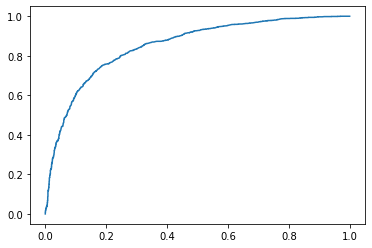

In [155]:
plt.plot( fpr, tpr )

In [156]:
fpr

array([0.        , 0.        , 0.        , ..., 0.98066667, 0.98266667,
       1.        ])

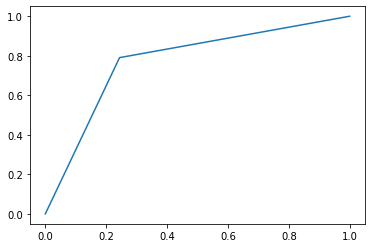

In [157]:
fpr, tpr, thres = roc_curve( y_test, model.predict(X_test))
plt.plot( fpr, tpr )

In [158]:
tpr.shape

(3,)

In [159]:
tpr.shape

(3,)

In [160]:
tpr

array([0.        , 0.79067122, 1.        ])

In [161]:
from sklearn.metrics import roc_auc_score

In [162]:
roc_auc_score(y_test, predictions)

0.8518259385665528

In [163]:
roc_auc_score(y_test, model.predict(X_test))

0.7733356086461888

# ДЗ Расчет оценок качества 

In [168]:
#Создаем функцию расчета оценок качества для указанного порога
def roc_calc (predict, y, n):
    tp_calc = 0
    tn_calc = 0
    fp_calc = 0
    fn_calc = 0
    tpr_calc = 0
    fpr_calc = 0
    precision_calc = 1
    recall_calc = 0
    F_calc = 0
    for  y_p, y_true in zip(predict, y):
        if y_p <=n and y_true == 0:
            tp_calc += 1
        if y_p >n and y_true == 1:
            tn_calc += 1
        if y_p <=n and y_true == 1:
            fp_calc += 1
        if y_p >n and y_true == 0:
            fn_calc += 1
       
    accuracy_calc = (tp_calc + tn_calc)/(tp_calc + tn_calc + fp_calc + fn_calc)
    if (tp_calc + fp_calc) != 0:
        precision_calc = tp_calc/(tp_calc + fp_calc)
    if (tp_calc + fn_calc) != 0:
        recall_calc = tp_calc /(tp_calc + fn_calc)
    
    if (precision_calc + recall_calc) != 0:
        F_calc = 2* precision_calc * recall_calc /( precision_calc + recall_calc)
  
    tpr_calc = tp_calc /(len(y) - np.sum(y))
    fpr_calc = fp_calc /np.sum(y)
    return tpr_calc, fpr_calc, accuracy_calc, precision_calc,recall_calc,F_calc

In [169]:
tpr=[]
fpr=[]
accuracyr=[]
precisionr=[]
recallr=[]
Fr=[]

#запускаем функцию с шагом порога 0.01 и фиксируем оценки качества для каждой итерации
for j in range(100):
    pos=0
    neg=0
    n=j/100.
    tpr_calc, fpr_calc, accuracy_calc, precision_calc,recall_calc,F_calc = roc_calc (predictions, y_test, n)
    tpr.append(tpr_calc)
    fpr.append(fpr_calc)
    accuracyr.append(accuracy_calc)
    precisionr.append(precision_calc)
    recallr.append(recall_calc)
    Fr.append(F_calc)

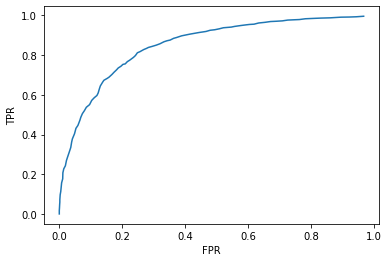

In [170]:
#рисуем кривую ROC

import matplotlib.pyplot as plt

plt.plot(fpr,tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")

plt.show()

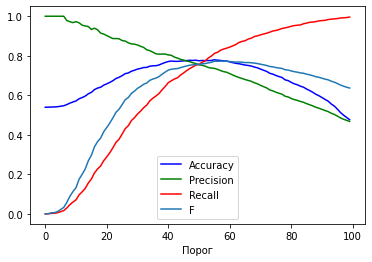

In [171]:
# изменение оценок в зависимости от порога
plt.plot(accuracyr,'b',label="Accuracy")
plt.plot(precisionr, 'g',label="Precision")
plt.plot(recallr,'r',label="Recall")
plt.plot(Fr,label="F")
plt.xlabel("Порог")
plt.legend(loc="lower center")
plt.show()